In [1]:
!pip install missingno
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
!pip install firebase-admin
import firebase_admin
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Konfigurasi database tujuan
dest_cred = credentials.Certificate("/work/staklimjerukagung-firebase-admin.json")
dest_app = firebase_admin.initialize_app(dest_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Referensi ke data sumber
source_ref = db.reference('/auto_weather_stat/id-03/data')

# Mengambil data dari database sumber
source_data = source_ref.get()

# Mengubah data menjadi DataFrame pandas
if source_data:
    # Mengubah data menjadi DataFrame
    cuacaT = pd.DataFrame.from_dict(source_data, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuacaT.columns:
        cuacaT.index.name = 'timestamp'  # Mengatur nama indeks
        cuacaT.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print(cuacaT.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data di jalur /auto_weather_stat/id-03/data.")

              dew humidity pressure temperature   timestamp  volt
0           26.71    73.76  1006.15       31.98           0  4.14
1702296831  23.29    89.28  1010.72       25.18  1702296831  4.08
1702296891  23.29    89.38  1010.75       25.16  1702296891  4.08
1702296951  23.31    89.58  1010.76       25.14  1702296951  4.08
1702297011  23.35    89.86  1010.82       25.13  1702297011  4.08


In [4]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1736522070,24.27139,98.64,1013.73,24.5,1736522070,4.06
1736522071,24.27139,98.64,1013.73,24.5,1736522071,4.06
1736522130,24.2548,98.66,1013.77,24.48,1736522130,4.06
1736522131,24.2548,98.66,1013.77,24.48,1736522131,4.06
1736522190,24.25987,98.69,1013.73,24.48,1736522190,4.07
1736522191,24.25987,98.69,1013.73,24.48,1736522191,4.07
1736522250,24.32992,98.75,1013.82,24.54,1736522250,4.07
1736522251,24.32992,98.75,1013.82,24.54,1736522251,4.07
1736522311,24.31332,98.77,1013.8,24.52,1736522311,4.07
1736522371,24.34174,98.82,1013.8,24.54,1736522371,4.07


In [5]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1736522070,24.27139,98.64,1013.73,24.5,1736522070,4.06
1736522071,24.27139,98.64,1013.73,24.5,1736522071,4.06
1736522130,24.2548,98.66,1013.77,24.48,1736522130,4.06
1736522131,24.2548,98.66,1013.77,24.48,1736522131,4.06
1736522190,24.25987,98.69,1013.73,24.48,1736522190,4.07
1736522191,24.25987,98.69,1013.73,24.48,1736522191,4.07
1736522250,24.32992,98.75,1013.82,24.54,1736522250,4.07
1736522251,24.32992,98.75,1013.82,24.54,1736522251,4.07
1736522311,24.31332,98.77,1013.8,24.52,1736522311,4.07
1736522371,24.34174,98.82,1013.8,24.54,1736522371,4.07


In [6]:
# Menampilkan 10 data terakhir
cuacaT.head(10)

,dew,humidity,pressure,temperature,timestamp,volt
0,26.71,73.76,1006.15,31.98,0,4.14
1702296831,23.29,89.28,1010.72,25.18,1702296831,4.08
1702296891,23.29,89.38,1010.75,25.16,1702296891,4.08
1702296951,23.31,89.58,1010.76,25.14,1702296951,4.08
1702297011,23.35,89.86,1010.82,25.13,1702297011,4.08
1702297071,23.32,89.85,1010.82,25.10,1702297071,4.08
1702297131,23.29,89.81,1010.85,25.08,1702297131,4.08
1702297190,23.27,89.87,1010.84,25.05,1702297190,4.08
1702297251,23.26,89.88,1010.88,25.04,1702297251,4.09
1702297311,23.26,90.00,1010.86,25.02,1702297311,4.08


In [7]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1736522070,24.27139,98.64,1013.73,24.5,1736522070,4.06
1736522071,24.27139,98.64,1013.73,24.5,1736522071,4.06
1736522130,24.2548,98.66,1013.77,24.48,1736522130,4.06
1736522131,24.2548,98.66,1013.77,24.48,1736522131,4.06
1736522190,24.25987,98.69,1013.73,24.48,1736522190,4.07
1736522191,24.25987,98.69,1013.73,24.48,1736522191,4.07
1736522250,24.32992,98.75,1013.82,24.54,1736522250,4.07
1736522251,24.32992,98.75,1013.82,24.54,1736522251,4.07
1736522311,24.31332,98.77,1013.8,24.52,1736522311,4.07
1736522371,24.34174,98.82,1013.8,24.54,1736522371,4.07


In [8]:
# Tentukan batas bawah dan batas atas waktu yang wajar dalam format UNIX
start_timestamp = pd.Timestamp('2020-01-01').timestamp()  # UNIX time untuk 1 Januari 2020
end_timestamp = pd.Timestamp.now().timestamp()  # UNIX time saat ini

# Hapus data dengan timestamp di luar rentang waktu yang wajar
cuacaT = cuacaT[(cuacaT['timestamp'] >= start_timestamp) & (cuacaT['timestamp'] <= end_timestamp)]

In [9]:
# Konversi timestamp ke datetime dalam format UTC
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuacaT['timestamp'] = cuacaT['timestamp'].dt.tz_convert('Asia/Jakarta')

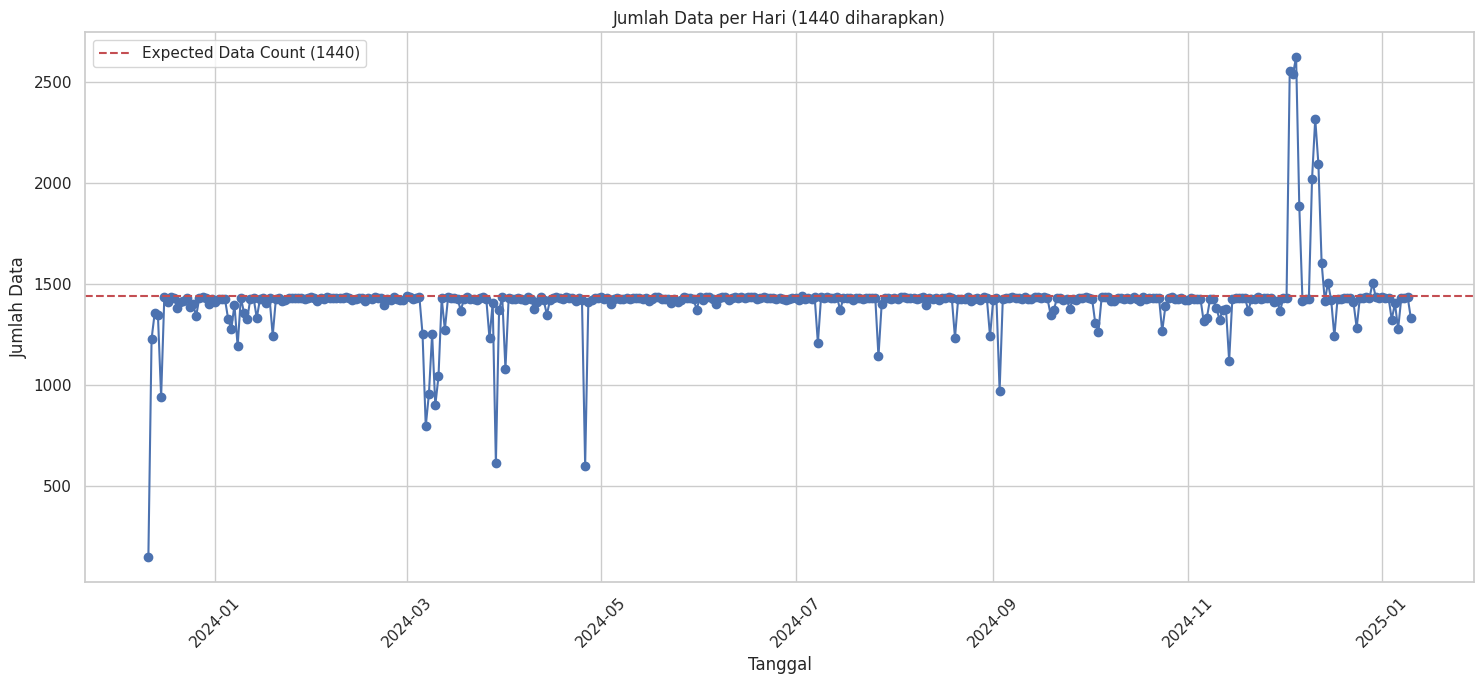

Hari dengan jumlah data yang kurang dari 1440:
           date  count
0    2023-12-11    148
1    2023-12-12   1226
2    2023-12-13   1357
3    2023-12-14   1343
4    2023-12-15    939
..          ...    ...
392  2025-01-06   1276
393  2025-01-07   1430
394  2025-01-08   1430
395  2025-01-09   1433
396  2025-01-10   1328

[397 rows x 2 columns]


In [10]:

# Mengelompokkan data berdasarkan hari
cuacaT['date'] = cuacaT['timestamp'].dt.date
data_per_day = cuacaT.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [11]:
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt,date
1736522070,24.27139,98.64,1013.73,24.5,2025-01-10 22:14:30+07:00,4.06,2025-01-10
1736522071,24.27139,98.64,1013.73,24.5,2025-01-10 22:14:31+07:00,4.06,2025-01-10
1736522130,24.2548,98.66,1013.77,24.48,2025-01-10 22:15:30+07:00,4.06,2025-01-10
1736522131,24.2548,98.66,1013.77,24.48,2025-01-10 22:15:31+07:00,4.06,2025-01-10
1736522190,24.25987,98.69,1013.73,24.48,2025-01-10 22:16:30+07:00,4.07,2025-01-10
1736522191,24.25987,98.69,1013.73,24.48,2025-01-10 22:16:31+07:00,4.07,2025-01-10
1736522250,24.32992,98.75,1013.82,24.54,2025-01-10 22:17:30+07:00,4.07,2025-01-10
1736522251,24.32992,98.75,1013.82,24.54,2025-01-10 22:17:31+07:00,4.07,2025-01-10
1736522311,24.31332,98.77,1013.8,24.52,2025-01-10 22:18:31+07:00,4.07,2025-01-10
1736522371,24.34174,98.82,1013.8,24.54,2025-01-10 22:19:31+07:00,4.07,2025-01-10


In [12]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
cuacaT.to_csv(
#cuacaT.tail(43200).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [13]:
rawdatacuaca = pd.read_csv("/work/cuaca.csv")

In [14]:
rawdatacuaca

,dew,humidity,pressure,temperature,timestamp,volt,date
0,23.29000,89.28,1010.72,25.18,2023-12-11 19:13:51+07:00,4.08,2023-12-11
1,23.29000,89.38,1010.75,25.16,2023-12-11 19:14:51+07:00,4.08,2023-12-11
2,23.31000,89.58,1010.76,25.14,2023-12-11 19:15:51+07:00,4.08,2023-12-11
3,23.35000,89.86,1010.82,25.13,2023-12-11 19:16:51+07:00,4.08,2023-12-11
4,23.32000,89.85,1010.82,25.10,2023-12-11 19:17:51+07:00,4.08,2023-12-11
...,...,...,...,...,...,...,...
560552,24.25987,98.69,1013.73,24.48,2025-01-10 22:16:31+07:00,4.07,2025-01-10
560553,24.32992,98.75,1013.82,24.54,2025-01-10 22:17:30+07:00,4.07,2025-01-10
560554,24.32992,98.75,1013.82,24.54,2025-01-10 22:17:31+07:00,4.07,2025-01-10
560555,24.31332,98.77,1013.80,24.52,2025-01-10 22:18:31+07:00,4.07,2025-01-10


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

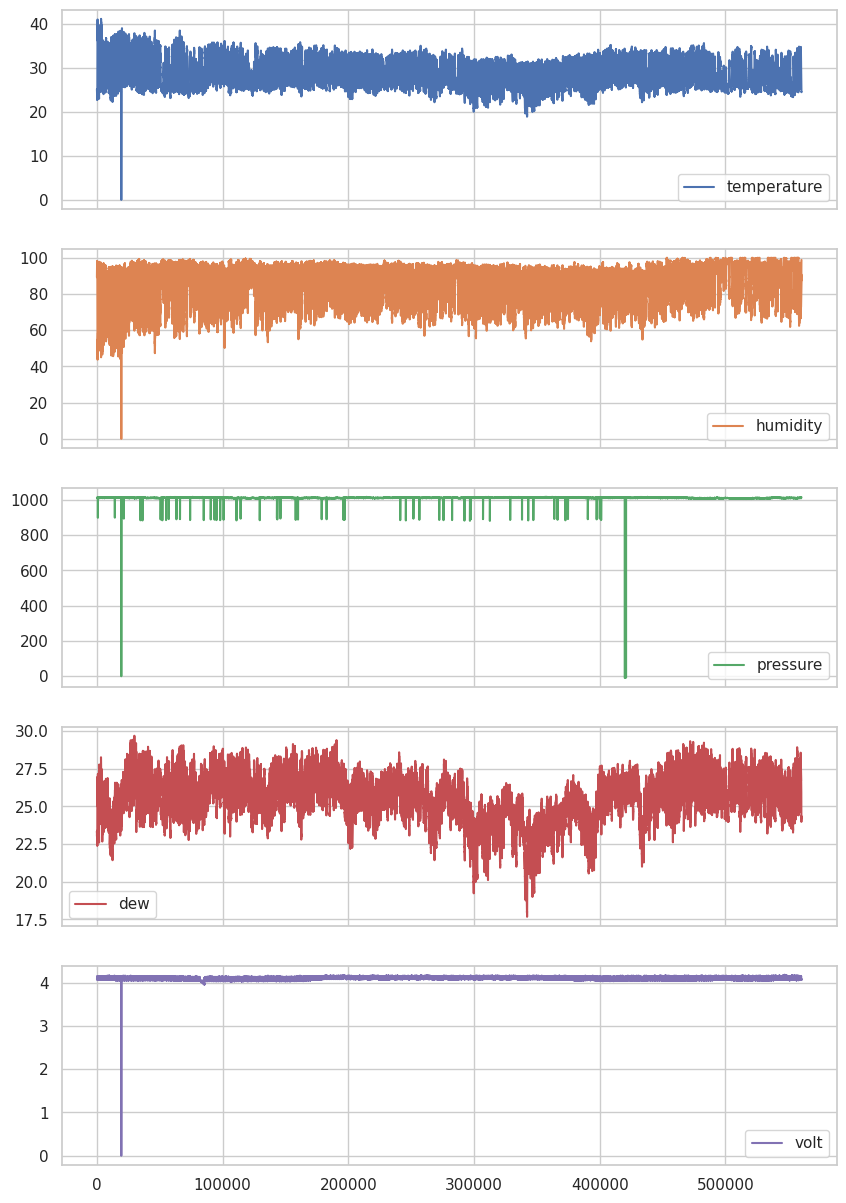

In [15]:
rawdatacuaca.plot(y=['temperature', 'humidity', 'pressure', 'dew', 'volt'], subplots=True, figsize=(10, 15))

In [16]:
# Membuat DataFrame awal
datacuaca = pd.DataFrame(rawdatacuaca)
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])
datacuaca.set_index('timestamp', inplace=True)

# Membuat rentang waktu yang lengkap dengan interval per menit
complete_range = pd.date_range(start=datacuaca.index.min(), end=datacuaca.index.max(), freq='T')

# Reindexing dengan rentang waktu lengkap, variabel lain akan terisi NaN
datacuaca = datacuaca.reindex(complete_range)

In [ ]:
datacuaca.plot(
    y=[
    'temperature', 'humidity', 'pressure', 'dew',
    'volt'
    ],
    subplots=True, figsize=(10, 15))
plt.show()

In [205]:
datacuaca

,dew,humidity,pressure,temperature,volt,date
2023-12-11 19:13:51+07:00,23.29,89.28,1010.72,25.18,4.08,2023-12-11
2023-12-11 19:14:51+07:00,23.29,89.38,1010.75,25.16,4.08,2023-12-11
2023-12-11 19:15:51+07:00,23.31,89.58,1010.76,25.14,4.08,2023-12-11
2023-12-11 19:16:51+07:00,23.35,89.86,1010.82,25.13,4.08,2023-12-11
2023-12-11 19:17:51+07:00,23.32,89.85,1010.82,25.10,4.08,2023-12-11
...,...,...,...,...,...,...
2025-01-06 10:29:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-06 10:30:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-06 10:31:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-06 10:32:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [206]:
# Membuat Random Forest sebagai model imputasi
rf_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=42)

# Hanya kolom numerik yang diimputasi
numeric_data = datacuaca.values

# Melakukan imputasi
imputed_data = rf_imputer.fit_transform(numeric_data)

# Mengupdate DataFrame dengan data hasil imputasi
datacuaca[:] = imputed_data

ValueError: could not convert string to float: '2023-12-11'

In [154]:
# Mengatur kolom index menjadi timestamp
datacuaca['timestamp'] = datacuaca.index

datacuaca

,dew,humidity,pressure,temperature,volt,date,timestamp
2023-12-11 19:13:51+07:00,23.29,89.28,1010.72,25.18,4.08,2023-12-11,2023-12-11 19:13:51+07:00
2023-12-11 19:14:51+07:00,23.29,89.38,1010.75,25.16,4.08,2023-12-11,2023-12-11 19:14:51+07:00
2023-12-11 19:15:51+07:00,23.31,89.58,1010.76,25.14,4.08,2023-12-11,2023-12-11 19:15:51+07:00
2023-12-11 19:16:51+07:00,23.35,89.86,1010.82,25.13,4.08,2023-12-11,2023-12-11 19:16:51+07:00
2023-12-11 19:17:51+07:00,23.32,89.85,1010.82,25.10,4.08,2023-12-11,2023-12-11 19:17:51+07:00
...,...,...,...,...,...,...,...
2025-01-06 10:29:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-06 10:29:51+07:00
2025-01-06 10:30:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-06 10:30:51+07:00
2025-01-06 10:31:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-06 10:31:51+07:00
2025-01-06 10:32:51+07:00,NaN,NaN,NaN,NaN,NaN,NaN,2025-01-06 10:32:51+07:00


In [160]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year



In [161]:
# Menghapus data yang memiliki nilai kurang dari 0 pada kolom tertentu (misalnya suhu, kelembapan, tekanan, dll)
# Gantilah nama kolom sesuai dengan nama kolom pada DataFrame Anda
datacuaca = datacuaca[(datacuaca['temperature'] >= 10) & 
                      (datacuaca['humidity'] >= 0) & 
                      (datacuaca['pressure'] >= 1000) & 
                      (datacuaca['dew'] >= 10) &
                      (datacuaca['volt'] >= 0)]

# Tampilkan hasil
datacuaca

,dew,humidity,pressure,temperature,volt,date,timestamp,hour,minute,day,month,year
2023-12-11 19:13:51+07:00,23.29,89.28,1010.72,25.18,4.08,2023-12-11,2023-12-11 19:13:51+07:00,19,13,11,12,2023
2023-12-11 19:14:51+07:00,23.29,89.38,1010.75,25.16,4.08,2023-12-11,2023-12-11 19:14:51+07:00,19,14,11,12,2023
2023-12-11 19:15:51+07:00,23.31,89.58,1010.76,25.14,4.08,2023-12-11,2023-12-11 19:15:51+07:00,19,15,11,12,2023
2023-12-11 19:16:51+07:00,23.35,89.86,1010.82,25.13,4.08,2023-12-11,2023-12-11 19:16:51+07:00,19,16,11,12,2023
2023-12-11 19:17:51+07:00,23.32,89.85,1010.82,25.10,4.08,2023-12-11,2023-12-11 19:17:51+07:00,19,17,11,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-05 03:14:51+07:00,23.68,100.00,1009.54,23.68,4.06,2025-01-05,2025-01-05 03:14:51+07:00,3,14,5,1,2025
2025-01-05 03:15:51+07:00,23.64,100.00,1009.57,23.64,4.06,2025-01-05,2025-01-05 03:15:51+07:00,3,15,5,1,2025
2025-01-05 03:16:51+07:00,23.65,100.00,1009.60,23.65,4.06,2025-01-05,2025-01-05 03:16:51+07:00,3,16,5,1,2025
2025-01-05 03:17:51+07:00,23.66,100.00,1009.54,23.66,4.07,2025-01-05,2025-01-05 03:17:51+07:00,3,17,5,1,2025


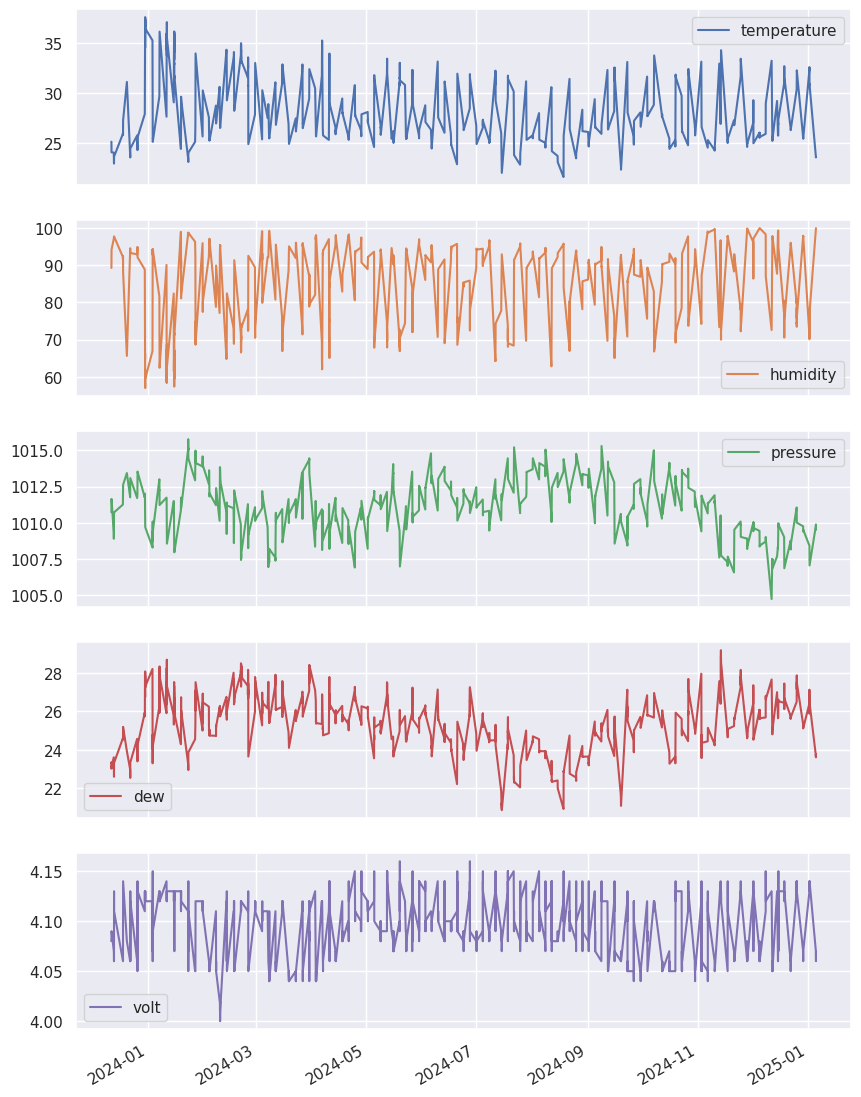

In [162]:
datacuaca.plot(
    y=[
    'temperature', 'humidity', 'pressure', 'dew',
    'volt'
    ],
    subplots=True, figsize=(10, 15))
plt.show()

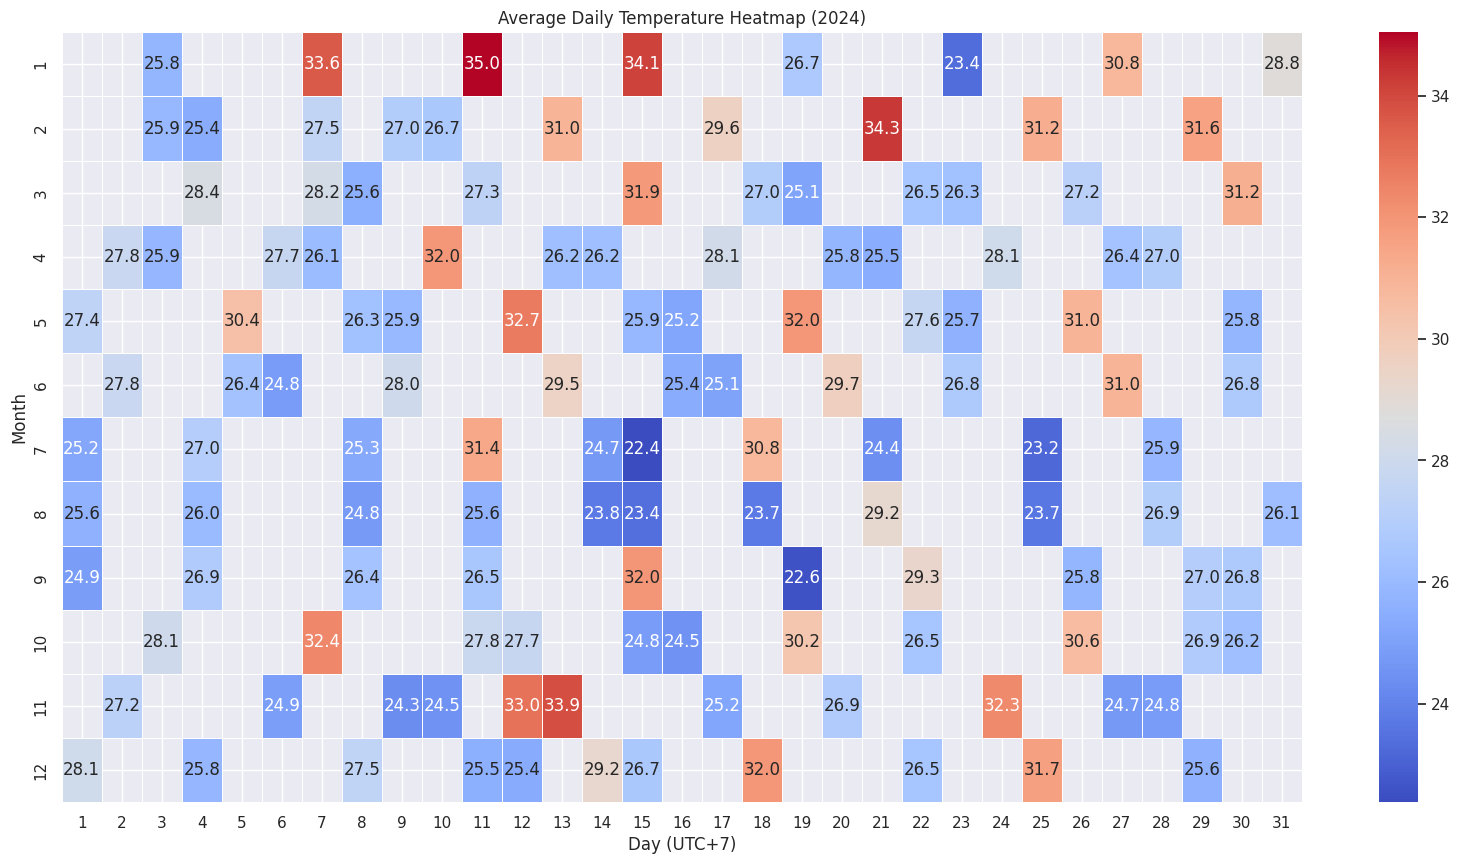

In [165]:
# Pilih tahun
selected_year = 2024
datacuaca_filtered = datacuaca[datacuaca['year'] == selected_year]

# Mengelompokkan data berdasarkan 'month' dan 'day', menghitung rata-rata suhu
datacuaca_grouped = datacuaca_filtered.groupby(['month', 'day']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap (sumbu X: hari, sumbu Y: bulan)
temperature_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(20, 10))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=0.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Day (UTC+7)')
ax.set_ylabel('Month')
ax.set_title(f'Average Daily Temperature Heatmap ({selected_year})')

# Menampilkan heatmap
plt.show()


ValueError: zero-size array to reduction operation fmin which has no identity

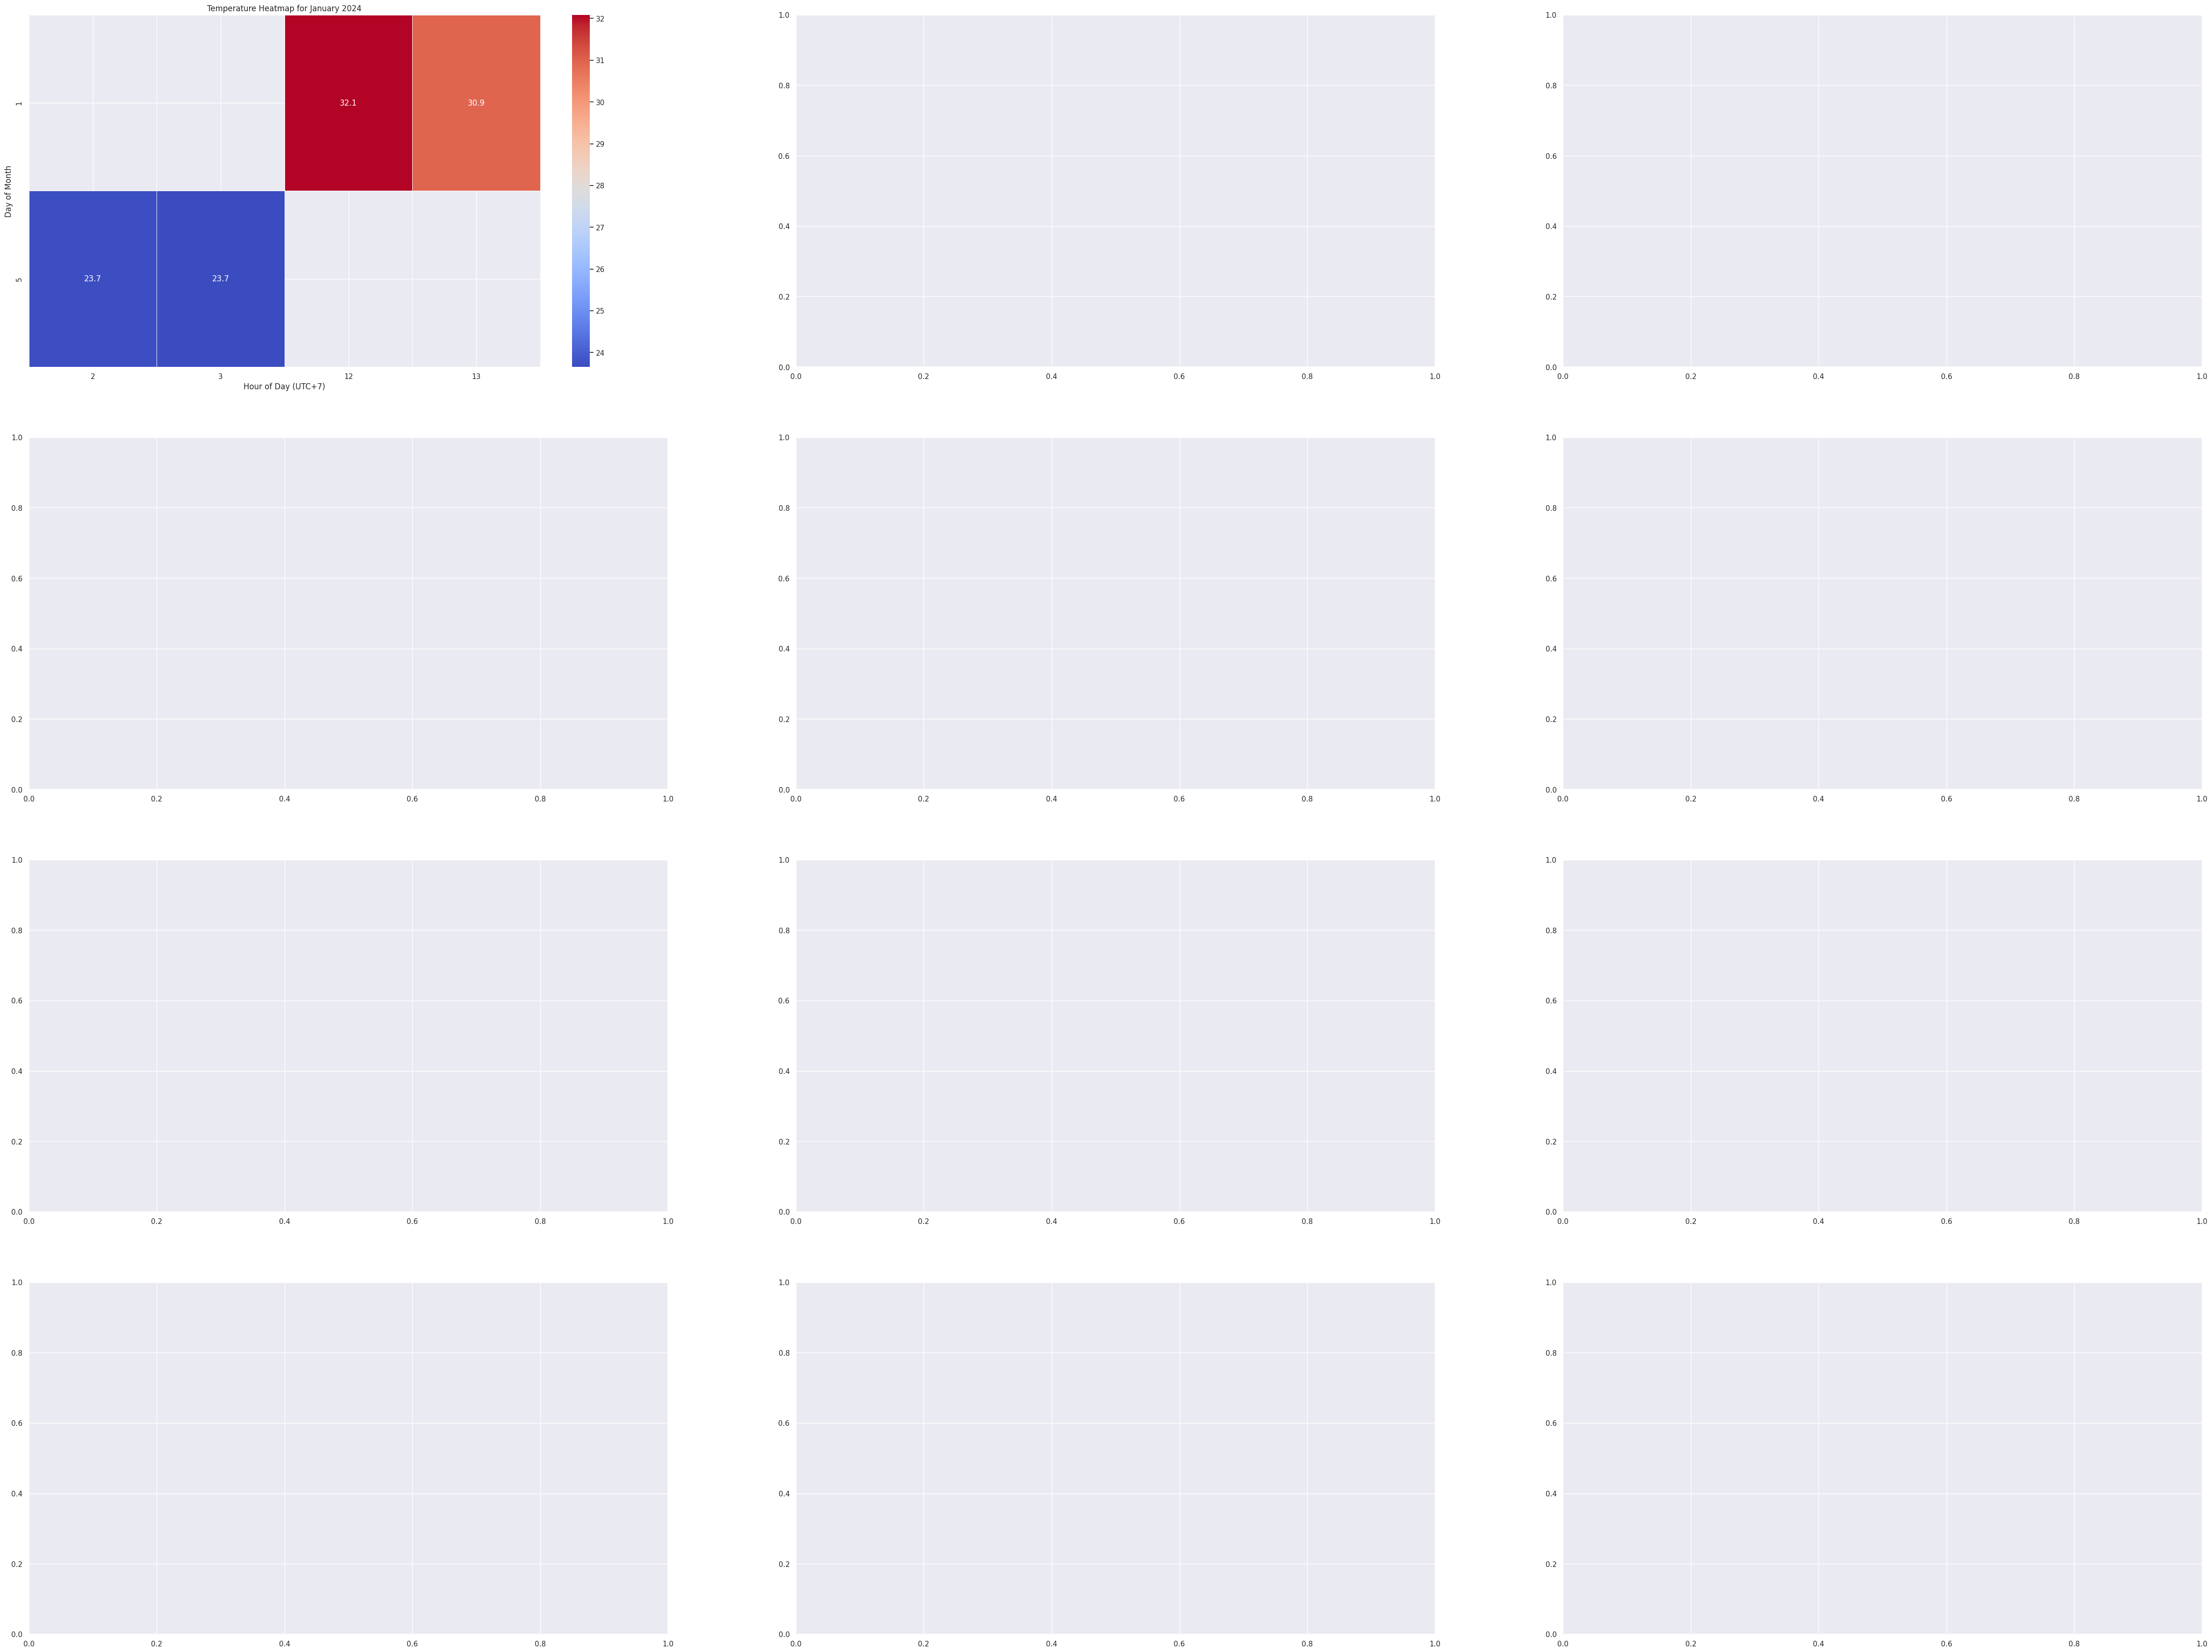

In [166]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']

# Menentukan rentang bulan dari Januari hingga Desember
months = range(1, 13)  # Bulan 1 hingga 12

# Mengatur ukuran grafik untuk menampung semua heatmap
fig, axs = plt.subplots(4, 3, figsize=(60, 45))
axs = axs.flatten()  # Meratakan array subplot untuk iterasi yang lebih mudah

# Looping untuk setiap bulan
for month in months:
    # Filter data untuk bulan tertentu
    monthly_data = datacuaca[(datacuaca['timestamp'].dt.year == 2025) & (datacuaca['timestamp'].dt.month == month)]

    # Mengurutkan data berdasarkan 'timestamp'
    monthly_data = monthly_data.sort_values(by='timestamp')

    # Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
    monthly_data['day'] = monthly_data['timestamp'].dt.day
    monthly_data['hour'] = monthly_data['timestamp'].dt.hour

    # Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
    datacuaca_grouped = monthly_data.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

    # Pivot dataframe untuk membuat format yang sesuai dengan heatmap
    temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

    # Membuat heatmap untuk bulan tersebut
    sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=0.5, ax=axs[month-1], cmap="coolwarm")
    
    # Memberi judul pada heatmap
    axs[month-1].set_title(f'Temperature Heatmap for {month_names[month-1]} 2024')
    axs[month-1].set_xlabel('Hour of Day (UTC+7)')
    axs[month-1].set_ylabel('Day of Month')

# Mengatur layout
plt.tight_layout()

# Menampilkan heatmaps
plt.savefig("Heatmap_month.jpg")
plt.show()



In [20]:
pilih_tahun = 2025
pilih_bulan = 1

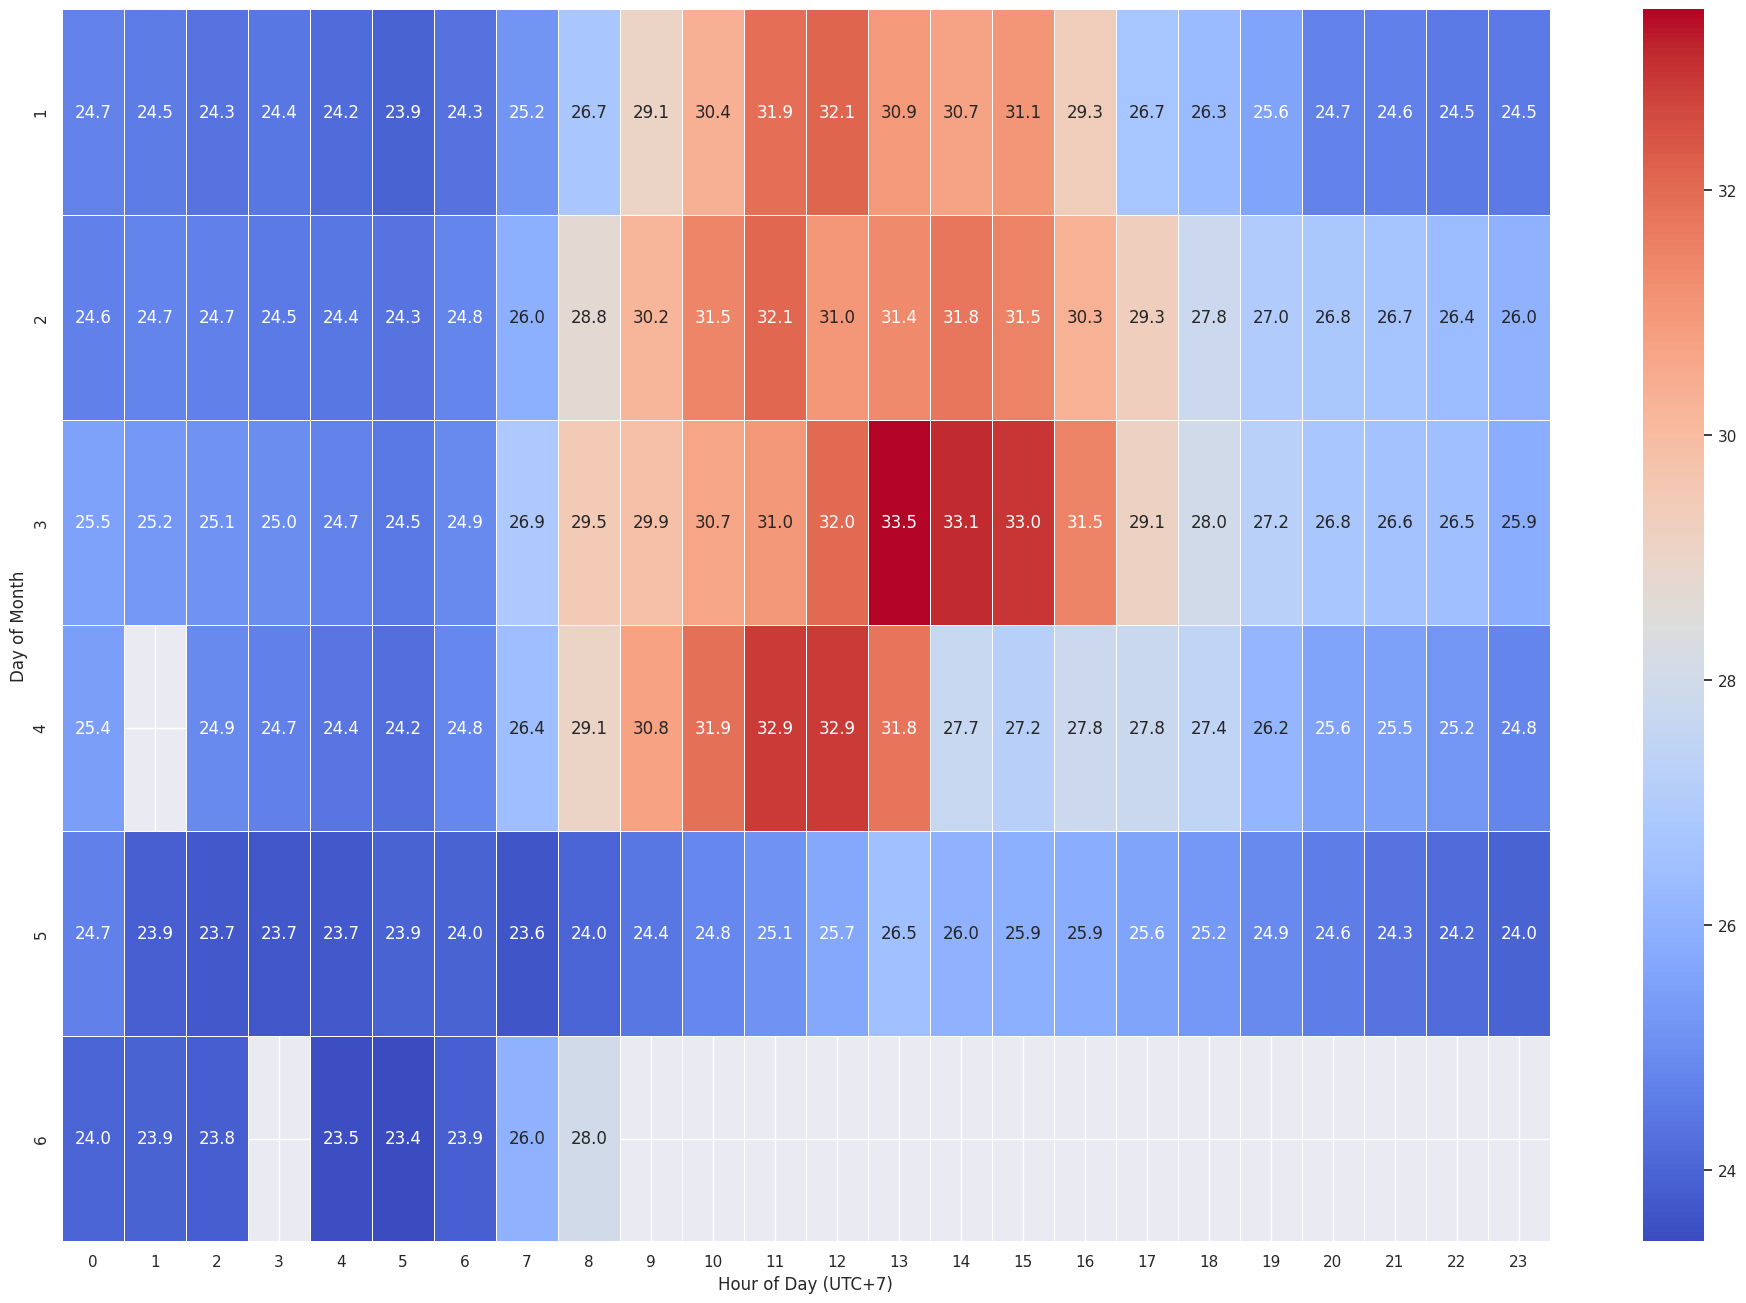

In [21]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month.jpg")
plt.show()



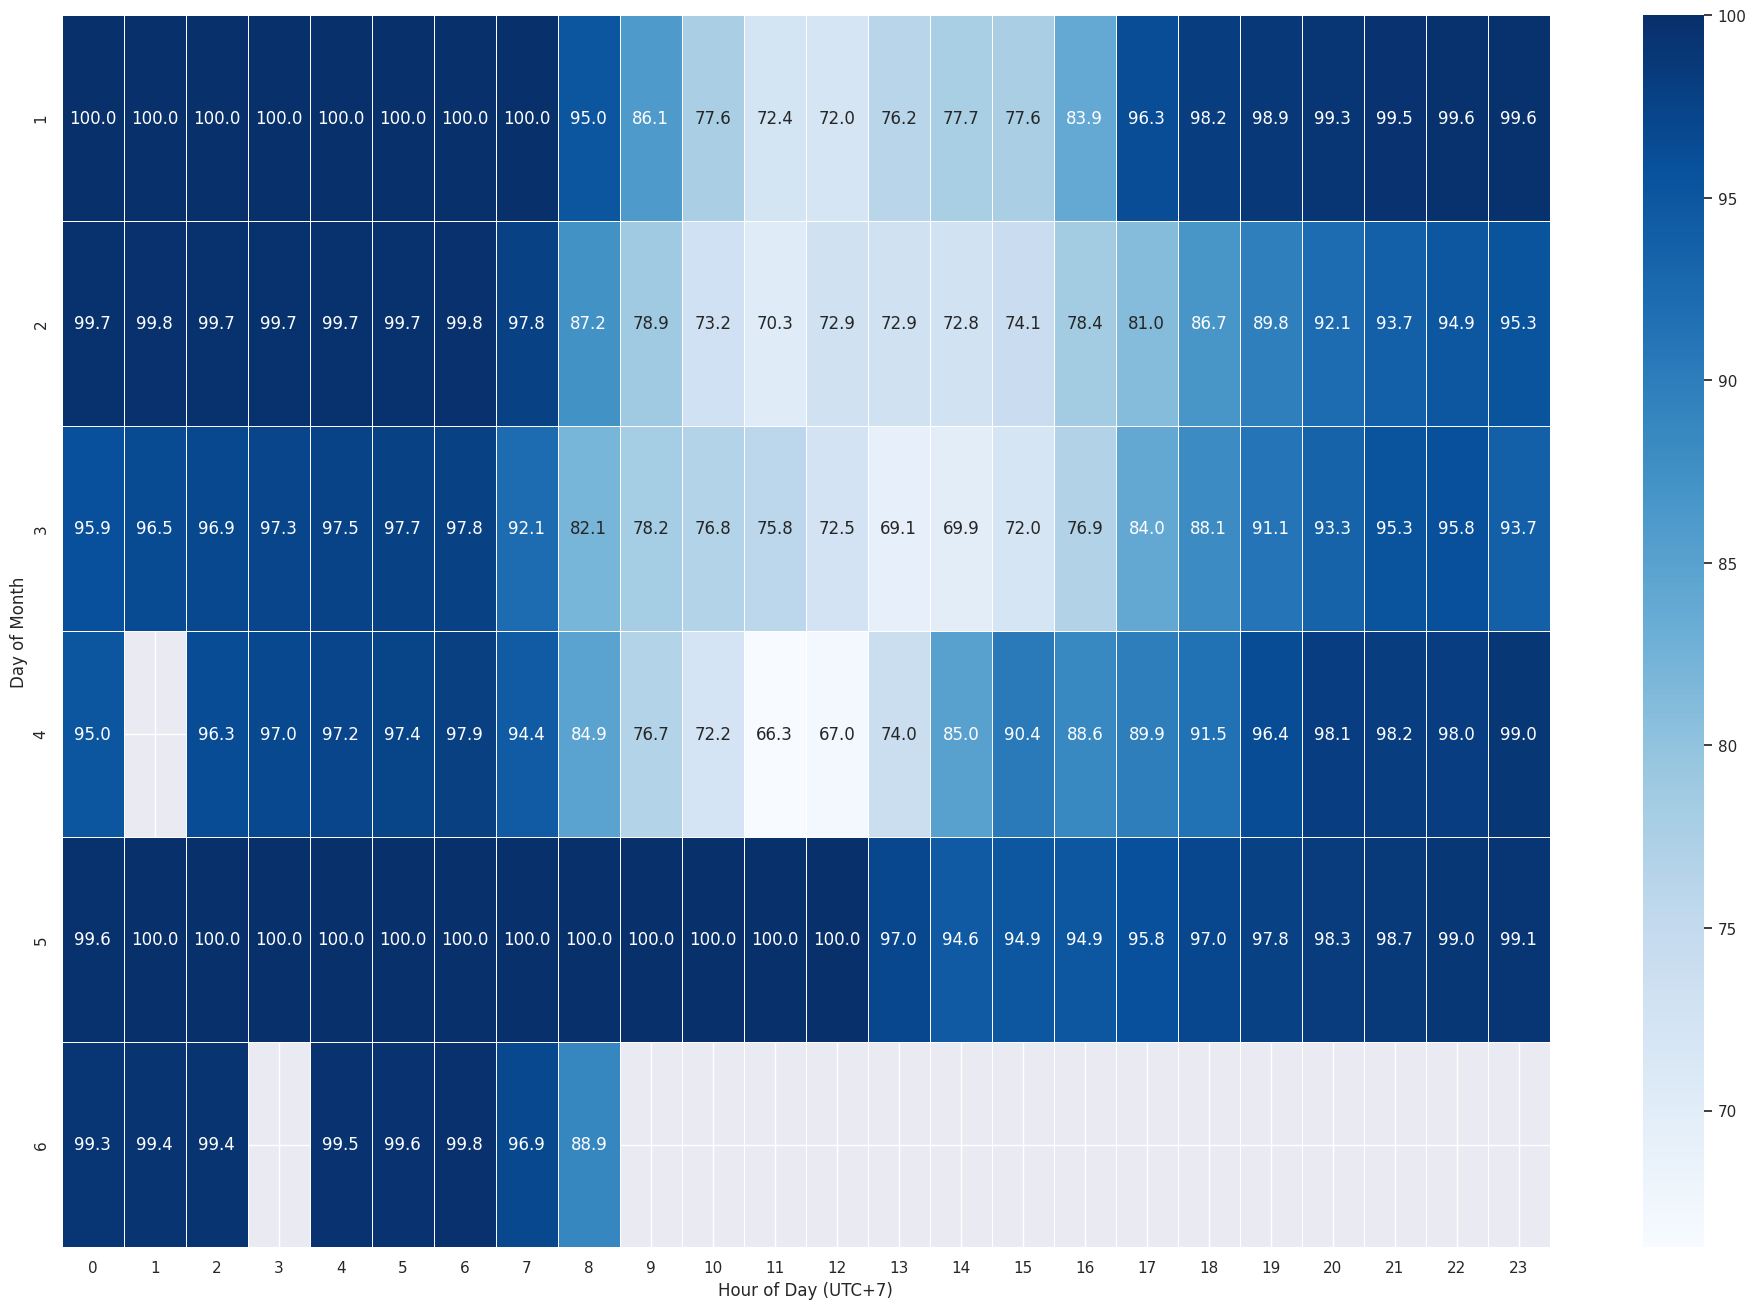

In [22]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(266.25, 0.5, 'Day of Month')

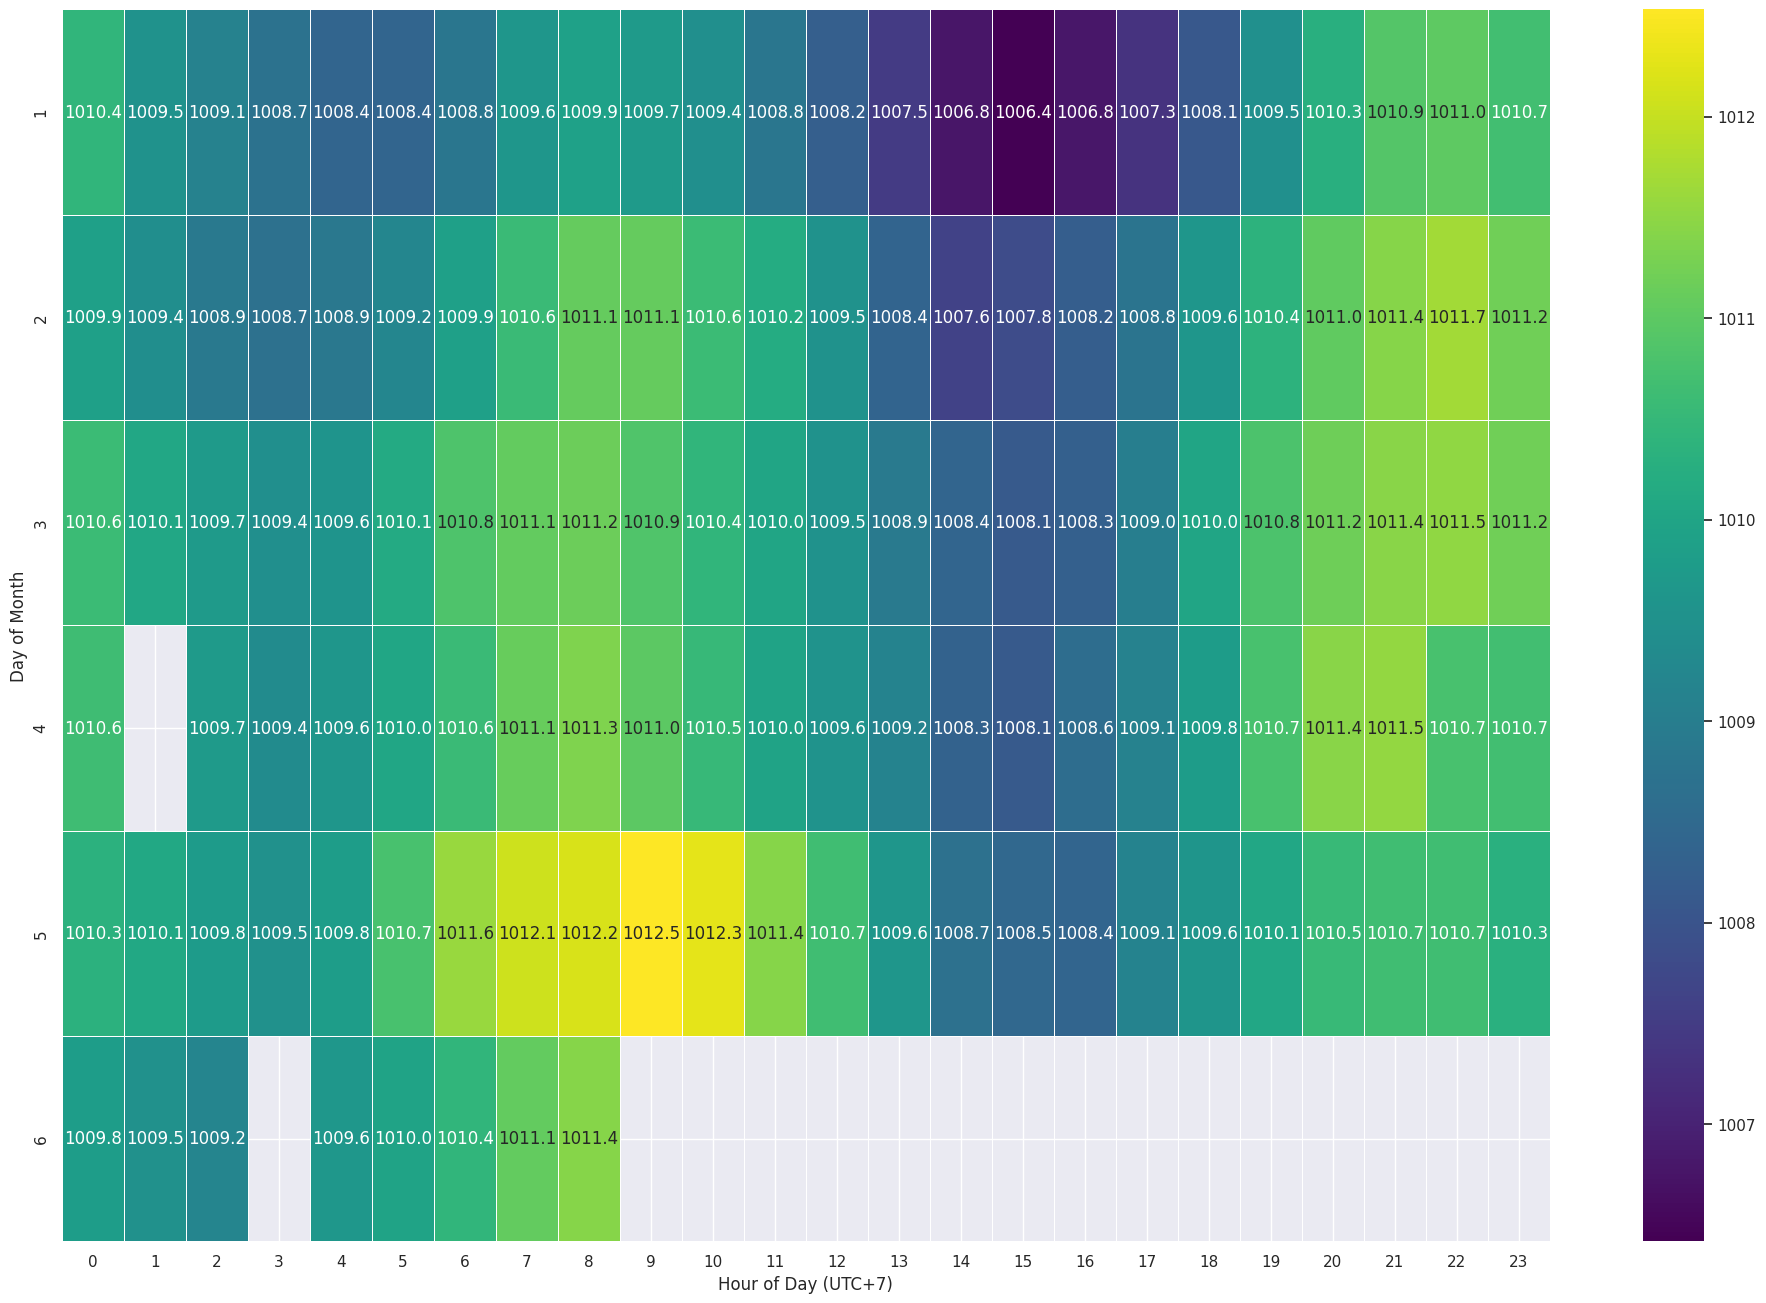

In [23]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(266.25, 0.5, 'Day of Month')

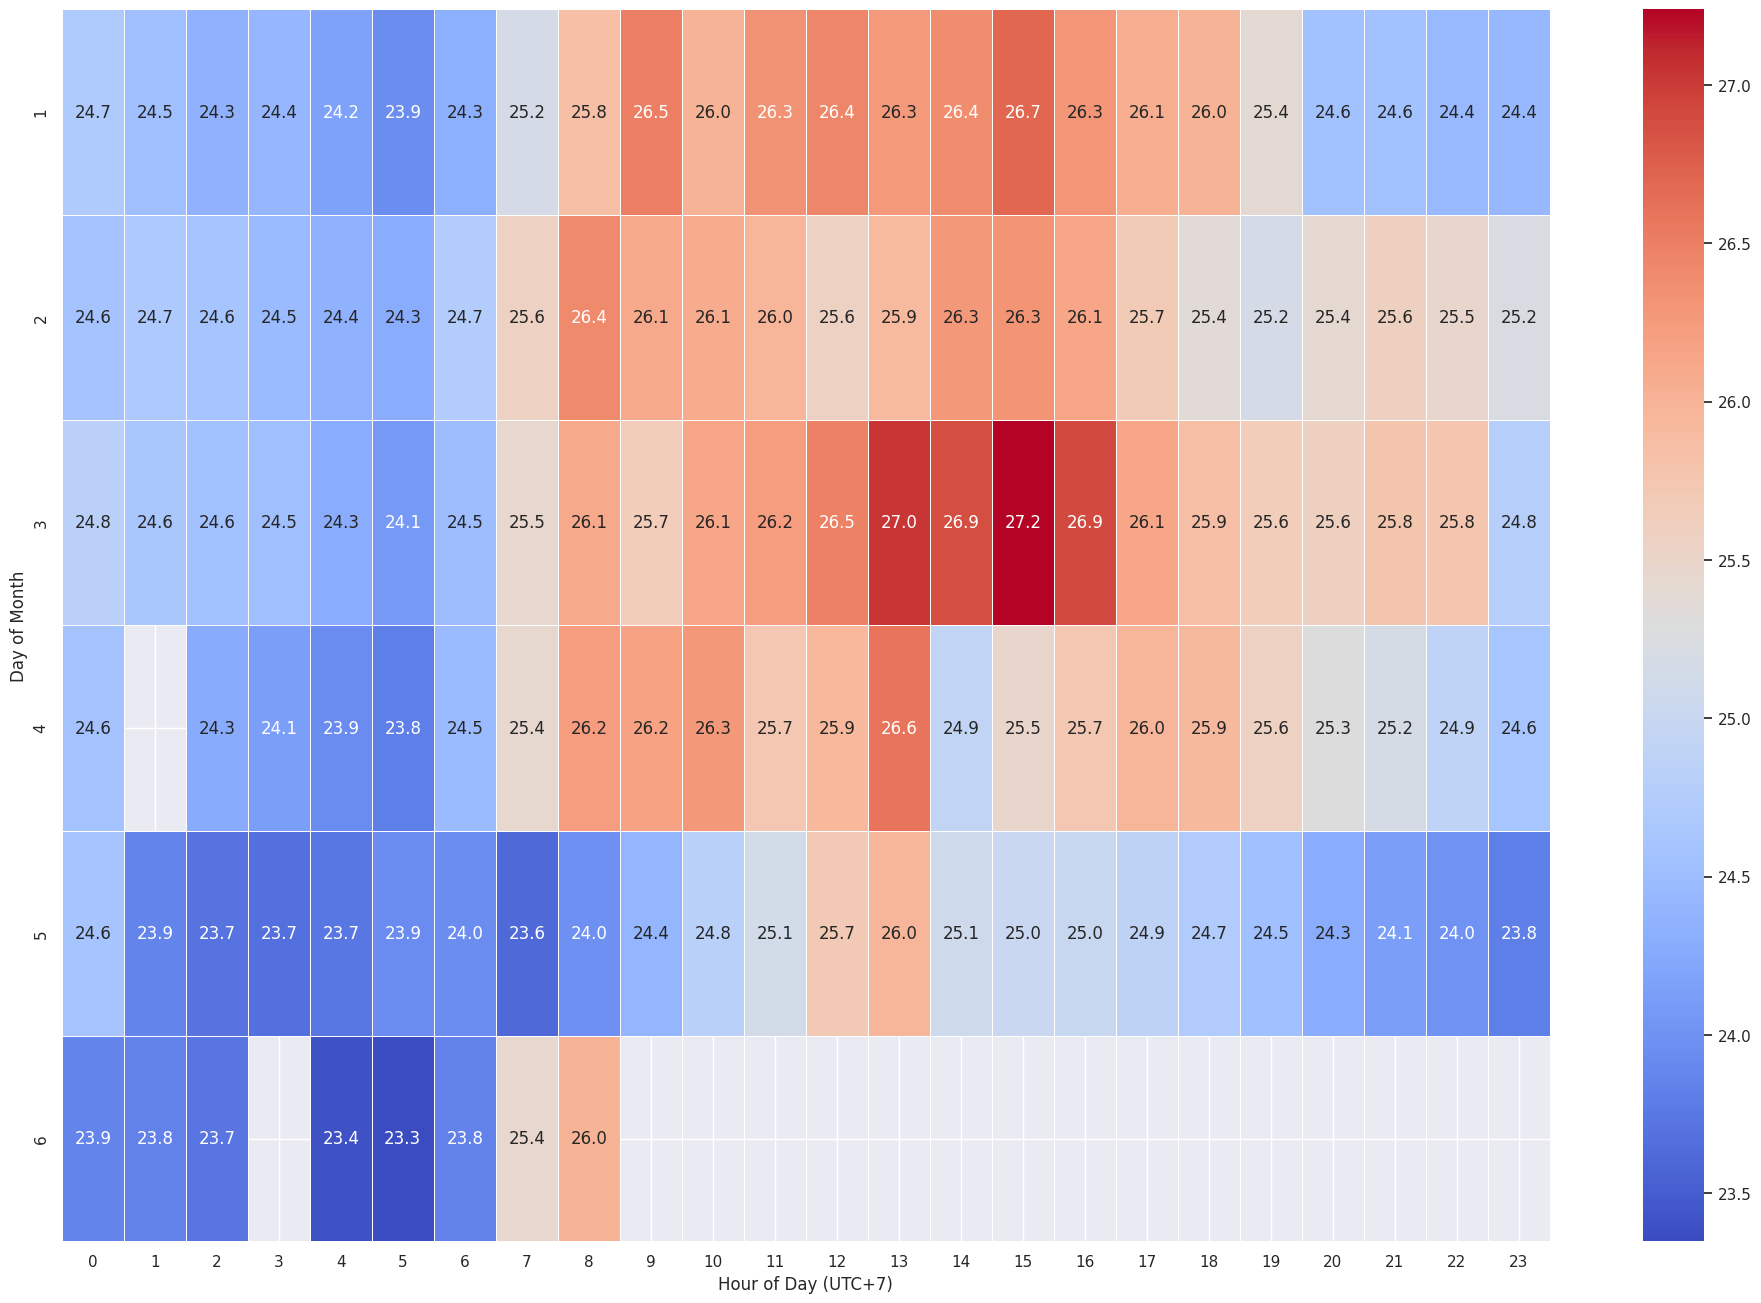

In [24]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>